## **Importing Data**


In [50]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report ,f1_score,precision_score,recall_score,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report ,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import pickle


In [51]:
df=pd.read_excel("E:\Computer Engineering and Systems\\4rd Year\First Term\Graduation Project\Driver_Monitoring_Feature\deployment\mobile\\final\\after_rescaler\output.xlsx")

In [52]:
df

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,-0.091886,-0.041929,1.041733,0.005073,0.002745,0.001724,0.889300,-1.736226,0.737459,...,0.203893,1.839220,34.490306,4.295944,-0.762893,-3.133657,-0.920069,1.356179,5.872845,2.072666
1,1,-0.079041,-0.055921,1.047316,0.004629,0.003038,0.001449,0.029985,-0.480929,0.022721,...,0.615175,1.395194,59.185304,4.071802,-0.648345,-1.435183,0.154387,1.181183,7.693199,2.017871
2,1,-0.053381,-0.054394,1.041476,0.007654,0.002444,0.001364,0.279845,-0.616869,0.480393,...,0.615175,1.435585,48.404334,3.258127,-0.814219,0.510539,-0.471836,1.198159,6.957322,1.805028
3,1,-0.042877,-0.048352,1.035236,0.007151,0.002292,0.001409,-0.130406,-0.900695,0.693882,...,0.615175,1.471129,48.379341,4.099234,-0.648345,-1.435183,-1.098059,1.212901,6.955526,2.024656
4,1,-0.048323,-0.041412,1.025356,0.006367,0.002350,0.001989,0.115792,-0.999228,0.180209,...,0.615175,1.443594,60.688868,4.972107,-0.814219,-3.133657,-1.546292,1.201497,7.790306,2.229822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,5,-0.073088,0.006450,0.976474,0.030301,0.018947,0.040999,0.228567,-0.447161,-0.102057,...,26.988643,142.450067,193.177307,109.150508,0.979830,2.066229,-1.756006,11.935245,13.898824,10.447512
10116,5,-0.072495,0.006714,0.976436,0.030108,0.018946,0.041011,0.229657,-0.452986,-0.101791,...,26.988643,142.443996,189.718485,109.007060,1.057164,2.066229,-1.756006,11.934990,13.773833,10.440645
10117,5,-0.071542,0.007664,0.977827,0.030283,0.018841,0.041108,0.216605,-0.472574,-0.119793,...,26.988643,144.355946,190.727943,107.464905,0.930697,2.066229,-1.756006,12.014822,13.810429,10.366528
10118,5,-0.071161,0.008584,0.979445,0.030478,0.018579,0.041951,0.222091,-0.479296,-0.098547,...,26.988643,144.469586,191.113307,105.121488,0.930697,2.066229,-1.756006,12.019550,13.824374,10.252877


In [53]:
data = df.copy()

In [54]:
data

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,-0.091886,-0.041929,1.041733,0.005073,0.002745,0.001724,0.889300,-1.736226,0.737459,...,0.203893,1.839220,34.490306,4.295944,-0.762893,-3.133657,-0.920069,1.356179,5.872845,2.072666
1,1,-0.079041,-0.055921,1.047316,0.004629,0.003038,0.001449,0.029985,-0.480929,0.022721,...,0.615175,1.395194,59.185304,4.071802,-0.648345,-1.435183,0.154387,1.181183,7.693199,2.017871
2,1,-0.053381,-0.054394,1.041476,0.007654,0.002444,0.001364,0.279845,-0.616869,0.480393,...,0.615175,1.435585,48.404334,3.258127,-0.814219,0.510539,-0.471836,1.198159,6.957322,1.805028
3,1,-0.042877,-0.048352,1.035236,0.007151,0.002292,0.001409,-0.130406,-0.900695,0.693882,...,0.615175,1.471129,48.379341,4.099234,-0.648345,-1.435183,-1.098059,1.212901,6.955526,2.024656
4,1,-0.048323,-0.041412,1.025356,0.006367,0.002350,0.001989,0.115792,-0.999228,0.180209,...,0.615175,1.443594,60.688868,4.972107,-0.814219,-3.133657,-1.546292,1.201497,7.790306,2.229822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,5,-0.073088,0.006450,0.976474,0.030301,0.018947,0.040999,0.228567,-0.447161,-0.102057,...,26.988643,142.450067,193.177307,109.150508,0.979830,2.066229,-1.756006,11.935245,13.898824,10.447512
10116,5,-0.072495,0.006714,0.976436,0.030108,0.018946,0.041011,0.229657,-0.452986,-0.101791,...,26.988643,142.443996,189.718485,109.007060,1.057164,2.066229,-1.756006,11.934990,13.773833,10.440645
10117,5,-0.071542,0.007664,0.977827,0.030283,0.018841,0.041108,0.216605,-0.472574,-0.119793,...,26.988643,144.355946,190.727943,107.464905,0.930697,2.066229,-1.756006,12.014822,13.810429,10.366528
10118,5,-0.071161,0.008584,0.979445,0.030478,0.018579,0.041951,0.222091,-0.479296,-0.098547,...,26.988643,144.469586,191.113307,105.121488,0.930697,2.066229,-1.756006,12.019550,13.824374,10.252877


<Axes: xlabel='Target', ylabel='count'>

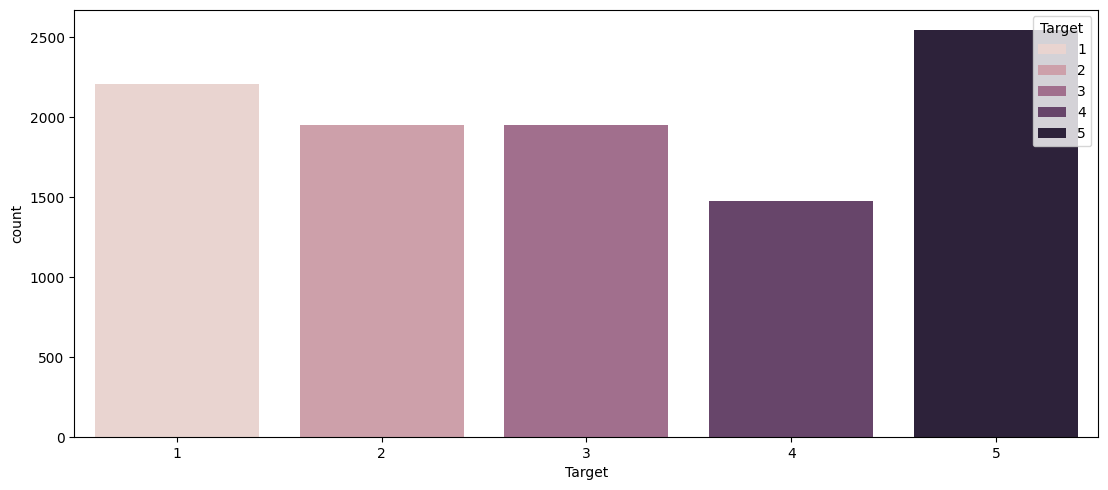

In [55]:
plt.figure(dpi = 100)
plt.subplots_adjust(left=0.9,right=2.5, top = 1)

sns.countplot(x="Target",hue="Target", data = data)

In [56]:
import pandas as pd

# Assuming you have your data in a DataFrame, let's call it 'df'
# Replace 'df' with your actual DataFrame name

# Define a mapping from numeric values to label names
label_mapping = {
   1: 'sudden_acceleration',
    2: 'sudden_right_turn',
    3: 'sudden_left_turn',
    4: 'sudden_break',
    5:'Normal'
}

# Replace the numeric values with label names
data2=data.copy()
data2['Target'] = data2['Target'].map(label_mapping)

# Now, 'Target(Class)' column contains the label names


<Axes: xlabel='Target', ylabel='count'>

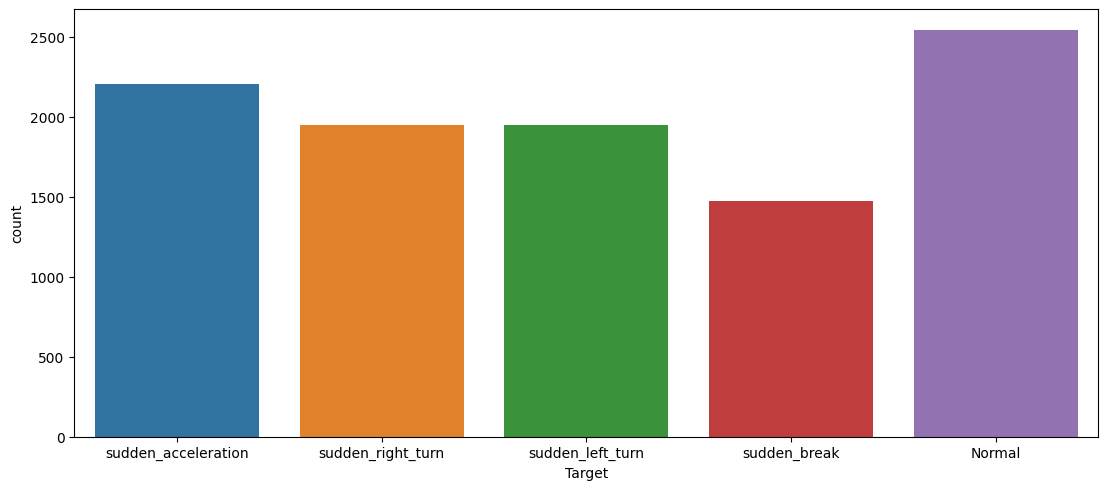

In [57]:
plt.figure(dpi = 100)
plt.subplots_adjust(left=0.9,right=2.5, top = 1)

sns.countplot(x="Target",hue="Target", data = data2)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Target       10120 non-null  int64  
 1   AccMeanX     10120 non-null  float64
 2   AccMeanY     10120 non-null  float64
 3   AccMeanZ     10120 non-null  float64
 4   AccCovX      10120 non-null  float64
 5   AccCovY      10120 non-null  float64
 6   AccCovZ      10120 non-null  float64
 7   AccSkewX     10120 non-null  float64
 8   AccSkewY     10120 non-null  float64
 9   AccSkewZ     10120 non-null  float64
 10  AccKurtX     10120 non-null  float64
 11  AccKurtY     10120 non-null  float64
 12  AccKurtZ     10120 non-null  float64
 13  AccSumX      10120 non-null  float64
 14  AccSumY      10120 non-null  float64
 15  AccSumZ      10120 non-null  float64
 16  AccMinX      10120 non-null  float64
 17  AccMinY      10120 non-null  float64
 18  AccMinZ      10120 non-null  float64
 19  AccM

In [59]:
data.isna().sum()

Target         0
AccMeanX       0
AccMeanY       0
AccMeanZ       0
AccCovX        0
              ..
GyroMedianY    0
GyroMedianZ    0
GyroStdX       0
GyroStdY       0
GyroStdZ       0
Length: 61, dtype: int64

In [60]:
data.describe()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,...,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,3.019368,0.017177,-0.016595,1.031705,0.031138,0.028597,0.017709,0.000628,-0.064621,0.298195,...,16.316056,28.517834,43.288023,56.307201,0.504772,-0.108894,-0.862233,4.802399,5.986317,6.602846
std,1.488507,0.063736,0.062943,0.040471,0.028421,0.025513,0.017819,0.425927,0.479139,0.716346,...,11.563944,26.215379,36.729058,62.742791,2.375374,1.785294,8.518630,2.335665,2.729976,3.565232
min,1.000000,-0.193203,-0.239486,0.948711,0.000014,0.000064,0.000033,-1.602963,-2.465171,-2.422095,...,-1.909201,0.231782,0.146820,0.235175,-8.004879,-10.045527,-21.580653,0.481437,0.383171,0.484948
25%,2.000000,-0.017286,-0.054273,1.001634,0.006598,0.007032,0.004298,-0.260884,-0.372439,-0.163859,...,6.265791,8.441519,12.587183,11.679272,-0.584431,-1.137992,-3.321536,2.905429,3.547842,3.417495
50%,3.000000,0.008906,-0.012721,1.020563,0.022461,0.020840,0.010371,-0.000414,-0.064336,0.133068,...,12.343460,21.831125,34.987728,50.908228,0.145035,0.060515,-0.213607,4.672379,5.915043,7.135000
75%,5.000000,0.051164,0.016452,1.059093,0.050661,0.043839,0.026998,0.261297,0.264999,0.745167,...,26.670072,41.047306,60.672923,73.386209,1.317106,0.839784,0.797999,6.406817,7.789283,8.566575
max,5.000000,0.310862,0.329596,1.191305,0.124743,0.129851,0.089371,1.631853,1.913024,2.726813,...,40.000000,144.469586,218.470424,572.893169,7.957717,6.176261,22.111250,12.019550,14.780745,23.935187


### Correlation Matrix

<Axes: >

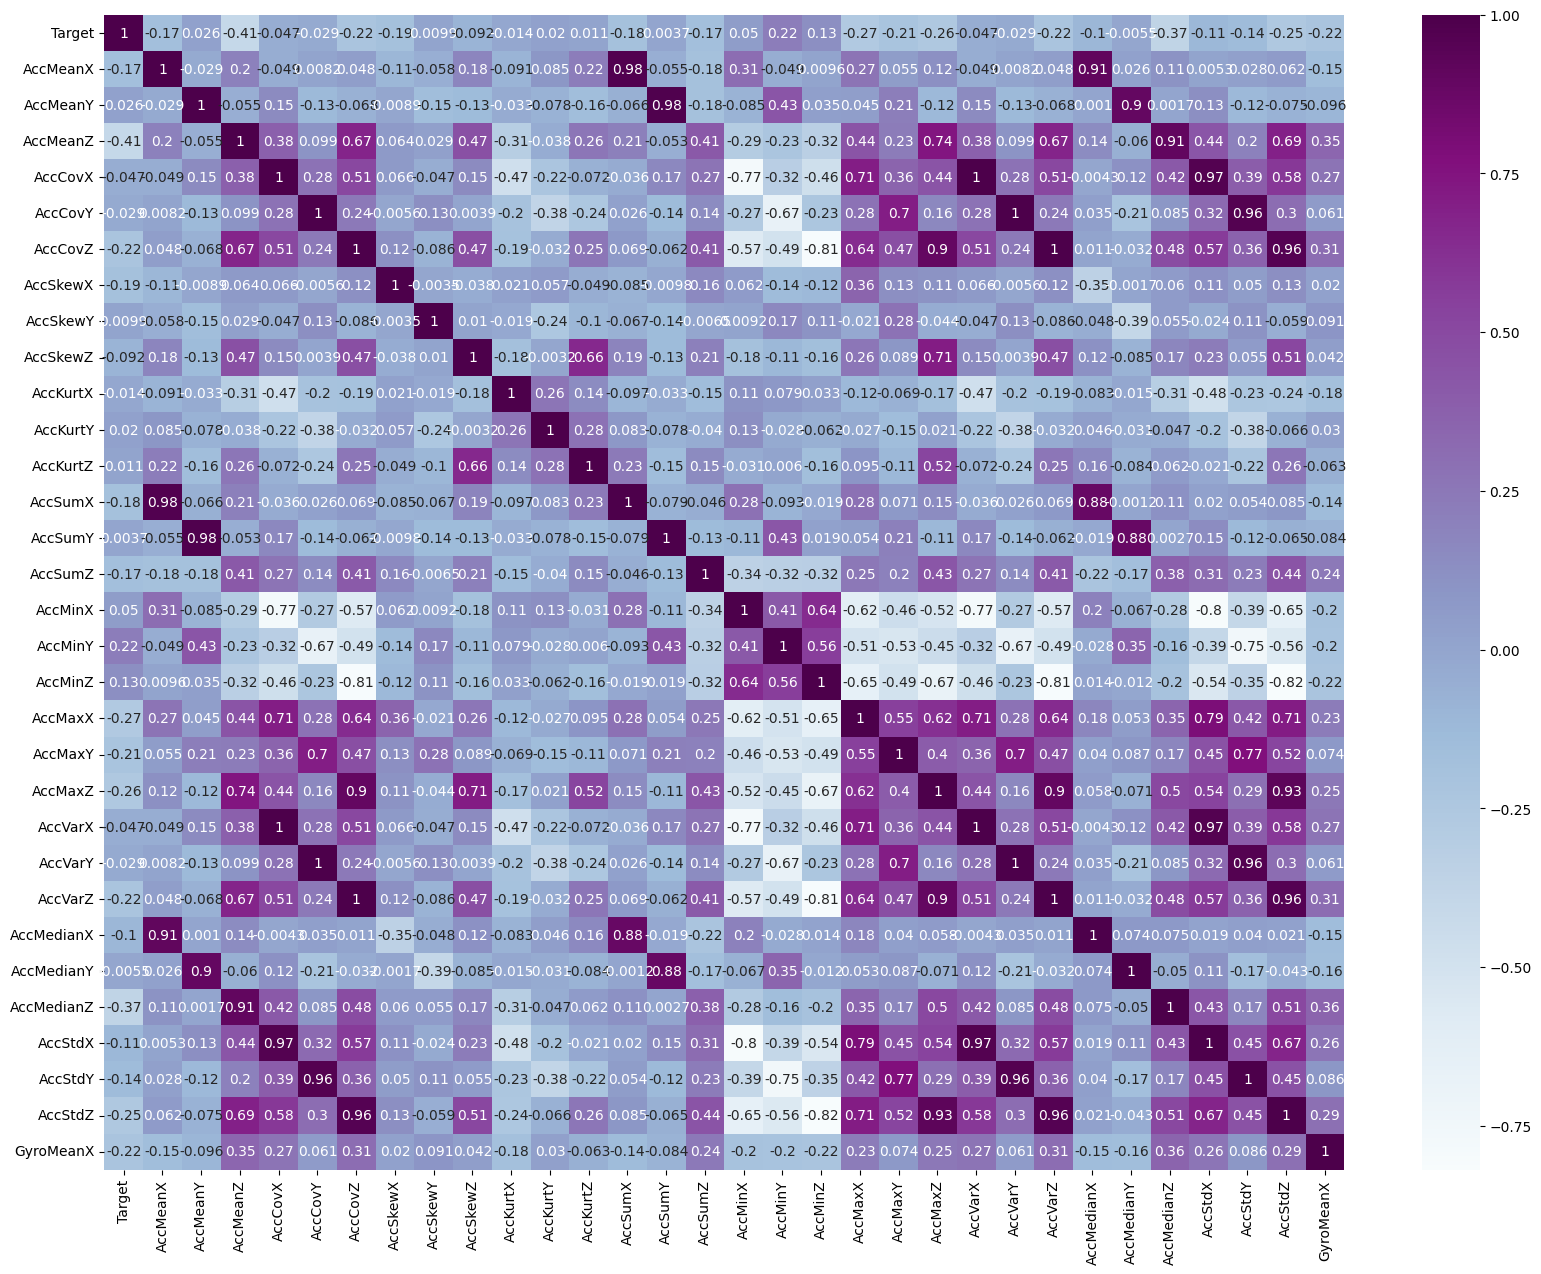

In [13]:
columns1_to_drop = df.columns[32:61]
columns2_to_drop = df.columns[1:32]
# print(columns1_to_drop)
# print(columns2_to_drop)

# columns2_to_drop
df1=data.drop(columns=columns1_to_drop)
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True,cmap="BuPu")

<Axes: >

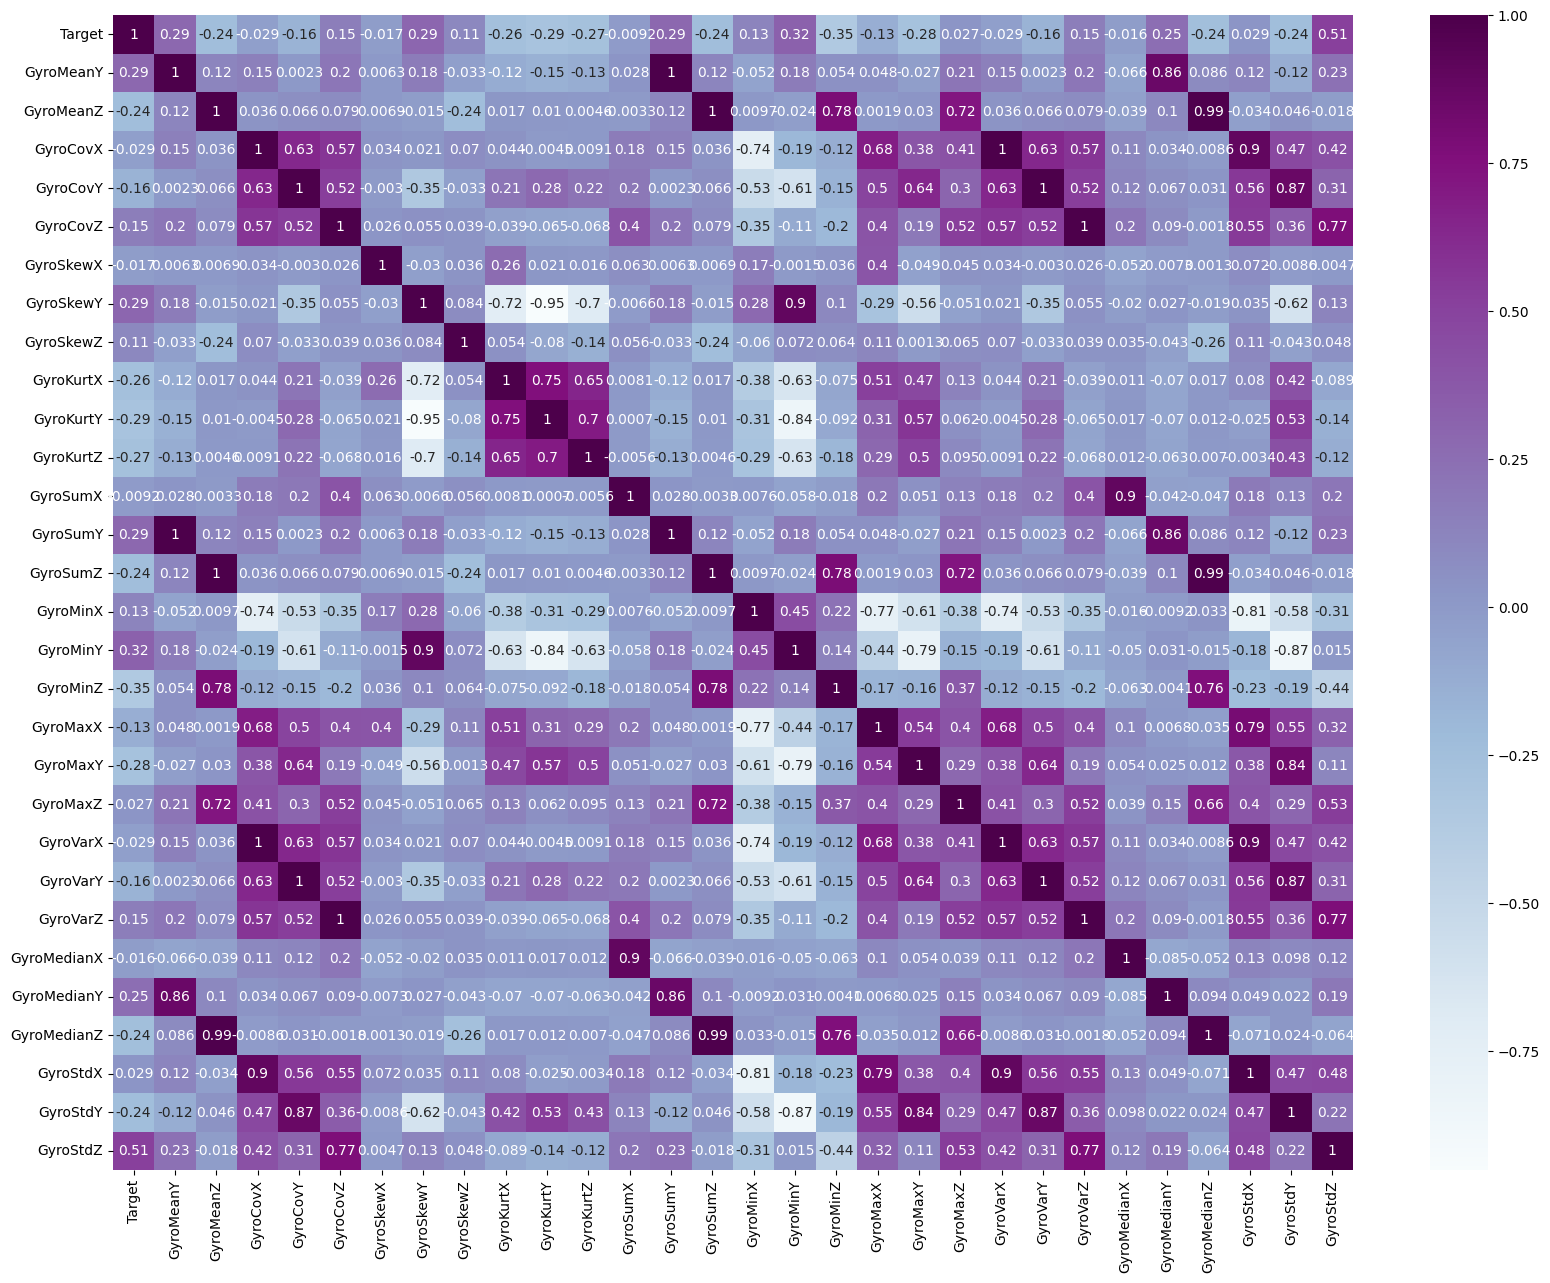

In [28]:
df2=data.drop(columns=columns2_to_drop)
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),annot=True,cmap="BuPu")


##  Shuffling

In [61]:

# Shuffle the DataFrame
df_shuffled = data.sample(frac=1, random_state=42)



In [62]:
data.head(20)

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,-0.091886,-0.041929,1.041733,0.005073,0.002745,0.001724,0.889300,-1.736226,0.737459,...,0.203893,1.839220,34.490306,4.295944,-0.762893,-3.133657,-0.920069,1.356179,5.872845,2.072666
1,1,-0.079041,-0.055921,1.047316,0.004629,0.003038,0.001449,0.029985,-0.480929,0.022721,...,0.615175,1.395194,59.185304,4.071802,-0.648345,-1.435183,0.154387,1.181183,7.693199,2.017871
2,1,-0.053381,-0.054394,1.041476,0.007654,0.002444,0.001364,0.279845,-0.616869,0.480393,...,0.615175,1.435585,48.404334,3.258127,-0.814219,0.510539,-0.471836,1.198159,6.957322,1.805028
3,1,-0.042877,-0.048352,1.035236,0.007151,0.002292,0.001409,-0.130406,-0.900695,0.693882,...,0.615175,1.471129,48.379341,4.099234,-0.648345,-1.435183,-1.098059,1.212901,6.955526,2.024656
4,1,-0.048323,-0.041412,1.025356,0.006367,0.002350,0.001989,0.115792,-0.999228,0.180209,...,0.615175,1.443594,60.688868,4.972107,-0.814219,-3.133657,-1.546292,1.201497,7.790306,2.229822
5,1,-0.065983,-0.040418,1.033675,0.008378,0.002065,0.002363,-0.022192,-1.106561,0.037240,...,0.615175,2.153438,53.604202,5.960076,-0.980092,-1.435183,-1.994525,1.467460,7.321489,2.441327
6,1,-0.065016,-0.031848,1.036057,0.007456,0.002570,0.002157,-0.064658,-0.658640,-0.136850,...,2.843177,1.915705,58.579684,7.983487,-1.012980,-0.787080,-1.546292,1.384090,7.653737,2.825506
7,1,-0.058237,-0.032506,1.042892,0.007216,0.002318,0.002455,-0.270378,-0.627070,-0.181479,...,2.843177,4.068481,60.312313,9.153242,-0.980092,-0.138977,-1.098059,2.017047,7.766100,3.025432
8,1,-0.045740,-0.032755,1.040076,0.008434,0.002108,0.002327,-0.209206,-0.625857,-0.002641,...,2.843177,3.927849,55.840428,8.420197,-0.814219,-0.787080,-0.702825,1.981880,7.472645,2.901758
9,1,-0.041673,-0.032733,1.034678,0.007946,0.001932,0.002512,-0.347861,-0.645567,0.111022,...,2.843177,3.760343,59.645161,7.993512,-0.648345,-1.435183,-1.098059,1.939160,7.723028,2.827280


In [63]:
df_shuffled.head(20)

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
7319,4,-0.082891,0.049315,1.007479,0.077056,0.024242,0.012027,0.186893,-0.296308,-0.101687,...,6.793116,3.878807,21.346217,9.551472,0.274911,1.580275,0.112124,1.969469,4.620197,3.090546
2919,2,0.022362,-0.027749,1.039245,0.069691,0.043415,0.013618,-0.139153,0.862129,-0.192885,...,7.284830,16.717551,7.623736,61.038310,3.748723,-1.258903,-12.380396,4.088710,2.761111,7.812702
5753,3,-0.030721,-0.007266,1.057760,0.081206,0.099265,0.085710,0.480424,0.292450,1.041991,...,40.000000,66.761801,136.956317,90.662052,3.600357,-4.339053,11.858962,8.170789,11.702834,9.521662
5982,3,0.048952,-0.081080,1.048638,0.056948,0.044497,0.029279,-0.292810,-1.017809,1.463496,...,27.659462,52.736273,14.498058,51.381203,4.836507,0.592318,9.639056,7.261974,3.807632,7.168068
623,1,0.012616,0.026547,1.032367,0.005890,0.005601,0.002841,-0.237065,0.338446,-0.488229,...,6.675391,10.619968,37.338974,11.301982,-0.442505,0.919414,-0.365485,3.258829,6.110562,3.361842
1730,1,0.022600,0.003486,1.006887,0.027557,0.009558,0.005338,0.059794,-0.406089,0.021814,...,8.744913,4.148639,30.634529,8.873453,0.008748,0.578214,-0.281154,2.036821,5.534847,2.978834
3428,2,0.056639,-0.020895,1.037152,0.083719,0.071546,0.062863,0.072522,0.056344,0.504060,...,17.885629,25.466285,84.141129,69.766035,0.915445,2.501046,-8.833316,5.046413,9.172847,8.352606
7093,4,-0.170877,0.086586,1.008248,0.043941,0.015319,0.011915,0.638358,-1.151575,-0.293985,...,13.354173,5.922204,12.294981,15.842847,0.336749,1.028809,0.546776,2.433558,3.506420,3.980307
4843,3,0.129997,-0.024769,1.073334,0.026027,0.026735,0.038192,-0.252494,-0.049536,2.070183,...,24.956207,59.632649,53.020430,55.312372,-2.584237,-0.853026,13.460604,7.722218,7.281513,7.437229
3837,2,0.067300,0.089702,1.067968,0.067792,0.058910,0.055572,-0.346077,-1.042304,-0.068791,...,8.355077,50.307499,38.344013,95.500718,2.430978,2.411849,-13.357970,7.092778,6.192254,9.772447


## Feature Selection

In [64]:
correlation_matrix =df_shuffled.corr()
# Get the absolute correlation values with the target variable
correlation_with_target = correlation_matrix['Target'].abs()
# print(correlation_with_target)
# # Set a threshold for strong correlation (you can adjust this threshold)
correlation_threshold = 0.3

# # Select columns with correlation above the threshold
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index

# # Display the selected features
print("Selected Features:")
print(selected_features)

# # Create a new DataFrame with only the selected features
df_selected = df_shuffled[selected_features]

# # Display the resulting DataFrame


Selected Features:
Index(['Target', 'AccMeanZ', 'AccMaxX', 'AccMedianZ'], dtype='object')


In [65]:
df_selected

,Target,AccMeanZ,AccMaxX,AccMedianZ
7319,4,1.007479,0.417851,1.047063
2919,2,1.039245,0.482861,1.055245
5753,3,1.057760,0.824844,1.006799
5982,3,1.048638,0.470467,1.011033
623,1,1.032367,0.179311,1.039272
...,...,...,...,...
5734,3,1.067096,0.824844,1.013109
5191,3,1.061793,0.217043,1.037871
5390,3,1.027089,0.371597,1.001986
860,1,1.035695,0.166732,1.033822


## Data Split

In [66]:
# Split the data into features (X) and the target (y)
X = df_shuffled.drop('Target', axis=1).values
y = df_shuffled['Target'].values

#using feature selections
X_s = df_selected.drop('Target', axis=1).values
y_s = df_selected['Target'].values
# X_s

In [69]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Split the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.20, random_state=100)


In [71]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8096, 60)
(8096,)
(2024, 60)
(2024,)


# Modeling

In [72]:
lr_1 = LogisticRegression()
#Training the model
lr_1.fit(X_train, y_train)

LogisticRegression()

In [73]:
#The score of the training process
lr_train_score = lr_1.score(X_train, y_train)
lr_train_score

0.8399209486166008

In [74]:
#The score of the testing process
lr_test_score = lr_1.score(X_test, y_test)
lr_test_score

0.8354743083003953

In [75]:
lr_y_pred = lr_1.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": lr_y_pred})
df_out.head(5)

,y_test,y_pred
0,1,1
1,5,5
2,5,5
3,5,1
4,5,5


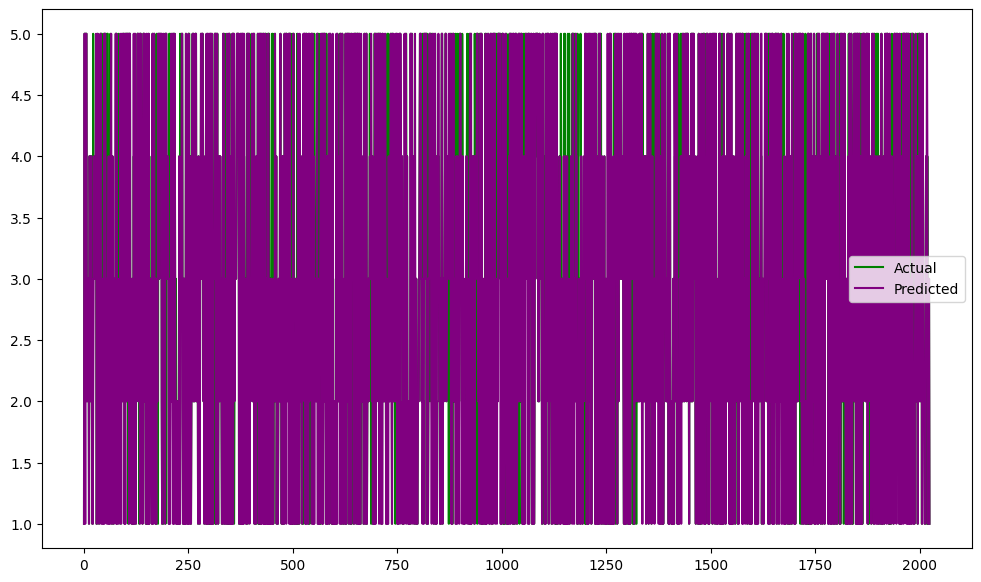

In [76]:
plt.figure(figsize=(12,7))
plt.plot(df_out)
plt.gca().get_lines()[0].set_color("green")
plt.gca().get_lines()[1].set_color("purple")
plt.legend(["Actual", "Predicted"])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

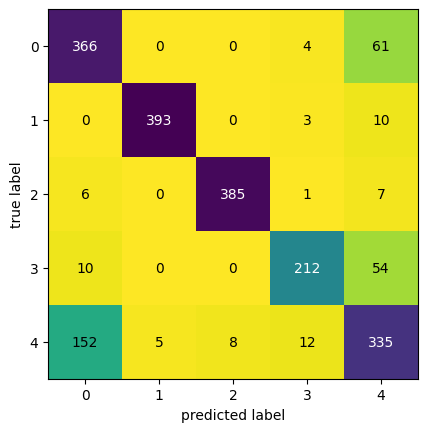

In [77]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), cmap = "viridis_r")

In [78]:
# Generate a classification report
report = classification_report(y_test, lr_y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.85      0.76       431
           2       0.99      0.97      0.98       406
           3       0.98      0.96      0.97       399
           4       0.91      0.77      0.83       276
           5       0.72      0.65      0.68       512

    accuracy                           0.84      2024
   macro avg       0.86      0.84      0.85      2024
weighted avg       0.84      0.84      0.84      2024



### Linear Regression without feature selecitons

In [79]:
lr = LogisticRegression()
#Training the model
lr.fit(X_train_s, y_train_s)

LogisticRegression()

In [80]:
#The score of the training process
lr_train_score = lr.score(X_train_s, y_train_s)
lr_train_score

0.6585968379446641

In [81]:
#The score of the testing process
lr_test_score = lr.score(X_test_s, y_test_s)
lr_test_score

0.6946640316205533

In [82]:
lr_y_pred_s = lr.predict(X_test_s)
df_out = pd.DataFrame({"y_test":y_test_s, "y_pred": lr_y_pred_s})
df_out.head(5)

,y_test,y_pred
0,1,5
1,5,5
2,5,5
3,5,5
4,5,5


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

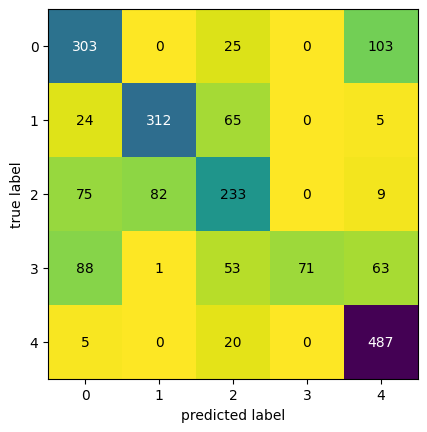

In [83]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test_s, lr_y_pred_s), cmap = "viridis_r")

### Random Forest witout feature selection

In [84]:
params = {'max_depth': list(range(6,16)), "max_features" : [2,3,4,5,6]}
grid = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'max_depth': 8, 'max_features': 6}


In [85]:
rf_1 = RandomForestClassifier(max_depth = grid.best_params_['max_depth'], max_features = grid.best_params_['max_features'])
#Training the model
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=6)

In [89]:
#The score of the training process
rf_train_score = rf_1.score(X_train, y_train)
rf_train_score

1.0

In [90]:
#The score of the testing process
rf_test_score = rf_1.score(X_test, y_test)
rf_test_score

1.0

In [91]:
rf_y_pred = rf_1.predict(X_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": rf_y_pred})
df_out.head()

,y_test,y_pred
0,1,1
1,5,5
2,5,5
3,5,5
4,5,5


In [92]:
# Generate a classification report
report = classification_report(y_test, rf_y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       431
           2       1.00      1.00      1.00       406
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       276
           5       1.00      1.00      1.00       512

    accuracy                           1.00      2024
   macro avg       1.00      1.00      1.00      2024
weighted avg       1.00      1.00      1.00      2024



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

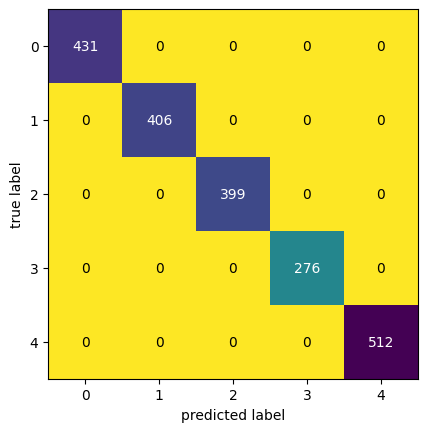

In [93]:
plot_confusion_matrix(confusion_matrix(y_test, rf_y_pred), cmap = "viridis_r")

### Random Forest with feature selection

In [41]:
params = {'max_depth': list(range(6,16)), "max_features" : [2,3,4,5,6]}
grid = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train_s, y_train_s)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


KeyboardInterrupt: 

In [93]:
rf = RandomForestClassifier(max_depth = grid.best_params_['max_depth'], max_features = grid.best_params_['max_features'])
#Training the model
rf.fit(X_train_s, y_train_s)

RandomForestClassifier(max_depth=15, max_features=3)

In [94]:
#The score of the training process
rf_train_score = rf.score(X_train_s, y_train_s)
rf_train_score

1.0

In [95]:
#The score of the testing process
rf_test_score = rf.score(X_test_s, y_test_s)
rf_test_score

0.998

In [96]:
rf_y_pred_s = rf.predict(X_test_s)
df_out = pd.DataFrame({"y_test":y_test_s, "y_pred": rf_y_pred_s})
df_out.head()

,y_test,y_pred
0,2,2
1,4,4
2,2,2
3,2,2
4,5,5


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

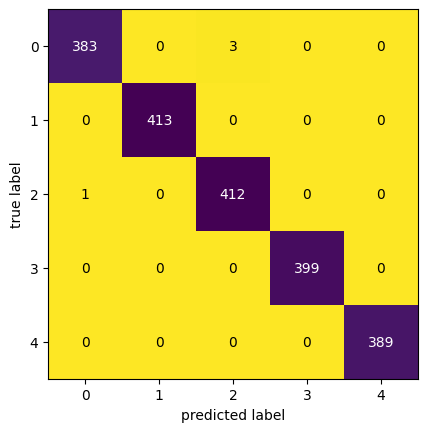

In [97]:
#confusion matrix
plot_confusion_matrix(confusion_matrix(y_test_s, rf_y_pred_s), cmap = "viridis_r")

In [98]:
# Save the model to a file using joblib
joblib.dump(rf_1, 'random_forest_model_without.joblib')

['random_forest_model_without.joblib']

In [99]:
# Save the model to a file using joblib
joblib.dump(rf, 'random_forest_model_with.joblib')

['random_forest_model_with.joblib']

In [94]:
pickle.dump(rf_1, open("E:\Computer Engineering and Systems\\4rd Year\First Term\Graduation Project\Driver_Monitoring_Feature\deployment\mobile\\final\mobile_2_model_2_with.pkl", "wb"))

In [44]:
pickle.dump(rf, open("Mobile_data\mobile_model_with.pkl", "wb"))

NameError: name 'rf' is not defined